In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
class LinearRegression:
    """
    Simple Linear Regression with Batch Gradient Descent.
    """
    def __init__(self) -> None:
        self.weights: np.ndarray = None
        self.bias: float = 0.0

    def lossFunction(self, y_true: np.ndarray, y_pred: np.ndarray) -> float:
        """Computes Mean Squared Error (MSE)."""
        return float(np.mean((y_true - y_pred) ** 2))

    def r2_score(self, y_true: np.ndarray, y_pred: np.ndarray) -> float:
        """Computes R² score."""
        ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
        ss_residual = np.sum((y_true - y_pred) ** 2)
        return 1 - (ss_residual / ss_total)

    def costFunction(self, X: np.ndarray, y_true: np.ndarray) -> float:
        """Computes cost using MSE."""
        y_pred = self.hypothesisFunction(X)
        return self.lossFunction(y_true, y_pred)

    def hypothesisFunction(self, X: np.ndarray) -> np.ndarray:
        """Predicts output using learned weights."""
        if self.weights is None:
            return np.zeros(len(X))
        return X.dot(self.weights) + self.bias

    def train(
        self,
        X: np.ndarray,
        y_true: np.ndarray,
        learning_rate: float = 0.0001,
        epochs: int = 50
    ) -> tuple[list[float], list[float]]:
        """Trains the model using Batch Gradient Descent."""
        if self.weights is None:
            self.weights = np.zeros(X.shape[1])
        
        m = len(y_true)
        mse_history: list[float] = []
        r2_history: list[float] = []

        for epoch in range(epochs):
            # Forward pass
            y_pred = self.hypothesisFunction(X)
            mse = self.lossFunction(y_true, y_pred)
            r2 = self.r2_score(y_true, y_pred)

            # Print progress
            print(f"Epoch {epoch+1}/{epochs} | MSE: {mse:.4f} | R² Score: {r2:.4f}")

            # Gradients
            dw = -(2.0/m) * X.T.dot(y_true - y_pred)
            db = -(2.0/m) * np.sum(y_true - y_pred)

            # Update weights
            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db

            # Store logs
            mse_history.append(mse)
            r2_history.append(r2)

        return mse_history, r2_history

In [3]:
data = pd.read_csv('HousingData.csv')
# Remove rows with missing values
data.dropna(inplace=True)

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [5]:
# 1. Define a split index for the data; for example, 80% for training.
split_index = int(0.8 * len(data))

The main distinction between the two methods is:

1. loc gets rows (and/or columns) with particular labels.

2. iloc gets rows (and/or columns) at integer locations

In [6]:
# 2. Split the DataFrame manually using .iloc
train_data = data.iloc[:split_index]
test_data = data.iloc[split_index:]

In [7]:
# 3. Separate features (X) and targets (Y) for both training and test sets.
X_train = train_data.drop(columns='MEDV').values
y_train = train_data['MEDV'].values

X_test = test_data.drop(columns='MEDV').values
y_test = test_data['MEDV'].values

# Understanding `fit`, `transform`, and `fit_transform` in scikit-learn

In scikit-learn, many classes (like scalers, encoders, vectorizers, etc.) follow a common interface with three main methods:

- **`fit`**:  
  This method learns the parameters from the data. For example, when using a scaler, it computes the mean and standard deviation of the features. It does **not** modify the data—it only computes and stores the necessary statistics or model parameters.

- **`transform`**:  
  After fitting, this method applies the learned parameters to transform the data. For instance, it scales the data using the previously computed mean and standard deviation.

- **`fit_transform`**:  
  This is a convenience method that combines `fit` and `transform` into a single call. It’s useful when you need to learn the parameters and immediately transform the data without having to call the two methods separately.

Below is an example using the `StandardScaler` from scikit-learn. The code demonstrates how to use `fit`, `transform`, and `fit_transform` with proper error checking, type annotations, and docstrings.

```python

def demonstrate_scaler_methods(data: np.ndarray) -> None:
    """
    Demonstrate the difference between fit, transform, and fit_transform methods
    using StandardScaler from scikit-learn.

    This function first uses `fit` to compute the mean and standard deviation of the data,
    then applies `transform` to scale the data. It also shows that `fit_transform` achieves
    the same result in a single step.

    :param data: NumPy array of shape (n_samples, n_features) containing the data to scale.
    :return: None
    """
        scaler = StandardScaler()

        # Compute parameters (mean and std) from the data
        scaler.fit(data)
        transformed_data = scaler.transform(data)

        # Alternatively, compute parameters and transform in one step
        fit_transformed_data = scaler.fit_transform(data)

        print("Transformed data (using fit and transform separately):")
        print(transformed_data)
        print("\nTransformed data (using fit_transform):")
        print(fit_transformed_data)


if __name__ == "__main__":
sample_data: np.ndarray = np.array([[1.0, 2.0],
                                    [3.0, 4.0],
                                    [5.0, 6.0]])




In [8]:
# 4) Scale features   ## if i wont add feature scaling then it give 0% accrucacy but by adding this now it is giving something
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# 5) Create and train the model
model = LinearRegression()
mse_history, r2_history = model.train(
    X=X_train_scaled,
    y_true=y_train,
    learning_rate=0.1,
    epochs=1000
)

Epoch 1/1000 | MSE: 662.2430 | R² Score: -6.8738
Epoch 2/1000 | MSE: 412.5374 | R² Score: -3.9049
Epoch 3/1000 | MSE: 270.1311 | R² Score: -2.2117
Epoch 4/1000 | MSE: 180.0690 | R² Score: -1.1409
Epoch 5/1000 | MSE: 122.8542 | R² Score: -0.4607
Epoch 6/1000 | MSE: 86.4263 | R² Score: -0.0276
Epoch 7/1000 | MSE: 63.1867 | R² Score: 0.2487
Epoch 8/1000 | MSE: 48.3317 | R² Score: 0.4254
Epoch 9/1000 | MSE: 38.8162 | R² Score: 0.5385
Epoch 10/1000 | MSE: 32.7065 | R² Score: 0.6111
Epoch 11/1000 | MSE: 28.7719 | R² Score: 0.6579
Epoch 12/1000 | MSE: 26.2282 | R² Score: 0.6882
Epoch 13/1000 | MSE: 24.5753 | R² Score: 0.7078
Epoch 14/1000 | MSE: 23.4936 | R² Score: 0.7207
Epoch 15/1000 | MSE: 22.7789 | R² Score: 0.7292
Epoch 16/1000 | MSE: 22.3004 | R² Score: 0.7349
Epoch 17/1000 | MSE: 21.9745 | R² Score: 0.7387
Epoch 18/1000 | MSE: 21.7474 | R² Score: 0.7414
Epoch 19/1000 | MSE: 21.5848 | R² Score: 0.7434
Epoch 20/1000 | MSE: 21.4644 | R² Score: 0.7448
Epoch 21/1000 | MSE: 21.3721 | R² Scor

In [10]:
# 5) Print Final Training Metrics
print(f"Final Training Loss (MSE): {mse_history[-1]:.4f}")
print(f"Final Training R² Score: {r2_history[-1]:.4f}")

Final Training Loss (MSE): 20.3695
Final Training R² Score: 0.7578


In [11]:
# 6) Evaluate on the test set
test_mse = model.costFunction(X_test_scaled, y_test)
test_r2 = model.r2_score(y_test, model.hypothesisFunction(X_test_scaled))

print(f"Test MSE: {test_mse:.4f}")
print(f"Test R² Score: {test_r2:.4f}")

Test MSE: 26.9737
Test R² Score: -0.1220


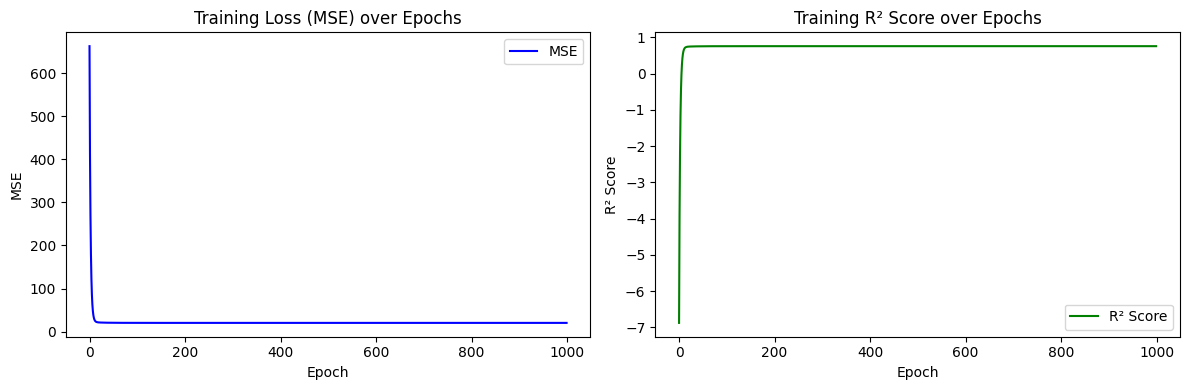

In [12]:
# 7) Plot MSE and R² Score over epochs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

axes[0].plot(mse_history, label='MSE', color='blue')
axes[0].set_title('Training Loss (MSE) over Epochs')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('MSE')
axes[0].legend()

axes[1].plot(r2_history, label='R² Score', color='green')
axes[1].set_title('Training R² Score over Epochs')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('R² Score')
axes[1].legend()

plt.tight_layout()
plt.show()